In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import json
import requests
import datetime as dt

from CP_trend import * #expand_months_manual, findTTT, plot_t0

from pandas.io.json import json_normalize
%load_ext autoreload
%autoreload 2
%load_ext autotime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.53 ms


In [247]:
#df_cnt_all = pd.read_csv('df_cnt_all_103119.csv', index_col = 0)
df_cnt_all = pd.read_csv('df_cnt_all_111919.csv', index_col = 0)

time: 18.7 ms


In [248]:
df_cnt_all.head(1)

,Market Index,Retail Site,Retailer ID,Crawled?,2/25/18,3/4/18,3/11/18,3/18/18,3/25/18,4/1/18,...,9/1/19,9/8/19,9/15/19,9/22/19,9/29/19,10/6/19,10/13/19,10/20/19,ret_id,trend
0.0,Contemporary Index,Alice + Olivia,864,Crawler,3.0,3.0,3.0,3.0,5.0,5.0,...,5.0,5.0,6.0,5.0,5.0,6.0,5.0,6.0,864,neon


time: 18.9 ms


In [25]:
# def makeRollingIndexPad(cnt_df, t0, trend, padweeks = 11): 
#     '''
#     modify make Rolling Index to include the 11 weeks before to do 3 wk and 12 wk moving averages
#     @param
#         cnt_df - Transpose of single retailer inventor count for a given trend
#         t0 - string of that trend's t0
#         trend - 'term' of the trend i.e. 'neon'
#         padweeks - number of weeks before t0 to include, this is for rolling averages, default is 11 (to start at 12th week)
    
#     '''
#     dt_index = pd.to_datetime(cnt_df.index)
    
#     t0_11 = (pd.to_datetime(t0) - pd.Timedelta(weeks=11)).strftime('%Y-%m-%d')
#     temp_df = cnt_df[dt_index>=t0_11]
#     temp_df = temp_df.fillna(0)
#     result_df = pd.DataFrame(index = temp_df.index)
    
#     for c in temp_df.columns:
#         startVal = findStartVal(cnt_df[dt_index>=t0][c]) #find the first value that is after t0, not with 12wk before t0
#         result_df[c] = temp_df[c]/startVal
    
#     return result_df

In [32]:
market_data = df_cnt_all
ret_df = market_data[(market_data['trend'] == 'neon') & (market_data['Retail Site'] == 'Asos')]
week_cols = list(ret_df.columns[4:-2])
ret_dfT = ret_df[week_cols].T
ret_dfT.columns = ['count']
neon_result = makeRollingIndexPad(ret_dfT, t0 = '2018-07-22', trend = 'neon', padweeks = 11)

time: 15.7 ms


In [34]:
neon_result[:20] #cool it worked

,count
5/6/18,0.987013
5/13/18,1.045455
5/20/18,1.045455
5/27/18,1.045455
6/3/18,1.012987
6/10/18,1.019481
6/17/18,1.051948
6/24/18,1.038961
7/1/18,1.077922
7/8/18,1.097403


time: 5.65 ms


In [44]:
pd.to_datetime(neon_result.index).strftime("%Y-%m-%d")

Index(['2018-05-06', '2018-05-13', '2018-05-20', '2018-05-27', '2018-06-03',
       '2018-06-10', '2018-06-17', '2018-06-24', '2018-07-01', '2018-07-08',
       '2018-07-15', '2018-07-22', '2018-07-29', '2018-08-05', '2018-08-12',
       '2018-08-19', '2018-08-26', '2018-09-02', '2018-09-09', '2018-09-16',
       '2018-09-23', '2018-09-30', '2018-10-07', '2018-10-14', '2018-10-21',
       '2018-10-28', '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25',
       '2018-12-02', '2018-12-09', '2018-12-16', '2018-12-23', '2018-12-30',
       '2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27', '2019-02-03',
       '2019-02-10', '2019-02-17', '2019-02-24', '2019-03-03', '2019-03-10',
       '2019-03-17', '2019-03-24', '2019-03-31', '2019-04-07', '2019-04-14',
       '2019-04-21', '2019-04-28', '2019-05-05', '2019-05-12', '2019-05-19',
       '2019-05-26', '2019-06-02', '2019-06-09', '2019-06-16', '2019-06-23',
       '2019-06-30', '2019-07-07', '2019-07-14', '2019-07-21', '2019-07-28',

time: 10.7 ms


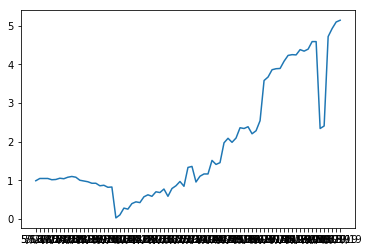

time: 1.04 s


In [35]:
plt.plot(neon_result)

In [51]:
# def plot_t0_ret(market_data, retailer, trend, t0, makeplot = True):
#     '''
#     plot the t0, tpeak, tend lines with retailer market_data, a.k.a inventory action
#     @param:
#         market_data - either inventory or price data (e.g. df_cnt_all or df_med_all)
#         retaier - name of the retaielr (e.g. 'Asos')
#         trend - name of the trend (e.g. 'one shoulder')
#         t0 = the t0 of the trend
#         plot = if True then make plots
#     @return t0 for this retailer
#     '''
    
    
#     ret_df = market_data[(market_data['trend'] == trend) & (market_data['Retail Site'] == retailer)]
#     week_cols = list(ret_df.columns[4:-2])
#     ret_dfT = ret_df[week_cols].T
#     ret_dfT.columns = ['count']
#     #normalized inventory action as a ratio to t0 with 11 week padding before t0
#     ret_norm_df = makeRollingIndexPad(ret_dfT, t0, trend, padweeks = 11) 
    
#     #trend_df = pd.DataFrame(index = search_data.columns)
#     #trend_df[term] = search_data.loc[term] #this is a series
#     ret_norm_df["3wkMA"] = ret_norm_df['count'].rolling(window=3).mean()
#     ret_norm_df["12wkMA"] = ret_norm_df['count'].rolling(window=12).mean()
#     ret_norm_df['greenbar'] = ret_norm_df["3wkMA"] - ret_norm_df["12wkMA"]
#     #change index format
#     ret_norm_df.index = pd.to_datetime(ret_norm_df.index).strftime("%Y-%m-%d")
#     resultL = findTTT(trenddf=ret_norm_df, startdate='2017-09-30')
    
#     if makeplot:
#         #plt.plot(list(search_data.columns), search_data.loc['neon'], color = 'b')
#         x = ret_norm_df.index
#         y = ret_norm_df['count']
#         y2 = ret_norm_df['3wkMA']
#         y3 = ret_norm_df['12wkMA']
#         y4 = ret_norm_df['greenbar']
#         fig, ax = plt.subplots(figsize=(20, 10))
#         ax.plot(x, y, color = 'b', label = retailer)
#         ax.plot(x, y2, color = 'r')
#         ax.plot(x, y3, color = 'c')
#         ax.bar(x, y4, color = 'g')

#         fig.autofmt_xdate()
#         ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

#         ax.grid(True)

#         start, end = ax.get_xlim()
#         #print(start, end)
#         ax.xaxis.set_ticks(np.arange(start, end, 10))

#         for xc in resultL:
#             plt.axvline(x=xc, label='line at x = {}'.format(xc))

#         plt.legend()
#         plt.show()
    
#     return resultL[0] #returns t0


time: 6.19 ms


In [49]:
retailers = ['Zara', 'Asos', 'Alice + Olivia', 'Nordstrom', 'Kohls', 'Target']

time: 1.09 ms


In [99]:
retailers = ['Zara', 'Asos', 'Alice + Olivia', 'Nordstrom', 'Kohls', 'Target']
market_data = df_cnt_all
#retailer = 'A+O'
trend = 'neon'
t0 = '2018-07-22'
t0_rets = []
for ret in retailers:
    t0_ret = plot_t0_ret(market_data, ret, trend, t0, False)
    t0_rets.append(t0_ret)

time: 170 ms


In [100]:
for ret_i, t0_ret_i in zip(retailers, t0_rets):
    print(ret_i, t0_ret_i)

Zara 2018-09-16
Asos 2018-11-18
Alice + Olivia 2019-02-03
Nordstrom 2018-12-09
Kohls 2019-06-23
Target 2019-08-25
time: 1.28 ms


In [101]:
t0

'2018-07-22'

time: 2.34 ms


In [102]:
delt_t0 = (pd.to_datetime(t0_rets) - pd.to_datetime(t0)).days/7

time: 3.04 ms


In [103]:
for ret_i, t0_ret_i, del_i in zip(retailers, t0_rets, delt_t0):
    print(ret_i, "\t \t", t0_ret_i, "\t", del_i)

Zara 	 	 2018-09-16 	 8.0
Asos 	 	 2018-11-18 	 17.0
Alice + Olivia 	 	 2019-02-03 	 28.0
Nordstrom 	 	 2018-12-09 	 20.0
Kohls 	 	 2019-06-23 	 48.0
Target 	 	 2019-08-25 	 57.0
time: 3.8 ms


In [115]:
search_data = pkl.load(open("./data/search_data_2019-09.pkl", "rb"))

time: 99.4 ms


In [151]:
# def getdelta_t0 (search_data, market_data, ret_list, trend, t0):
#     '''
#     @return a dataframe that has the difference in t0 between retailers and trend
#     '''
#     result = pd.DataFrame()
    
#     #find the delta t0
#     t0_rets = []
#     for ret in ret_list:
#         t0_ret = plot_t0_ret(market_data, ret, trend, t0, False)
#         t0_rets.append(t0_ret)
        
#     result["trend"] = [trend]*len(ret_list)
#     result["trend_t0"] = t0
#     result["retailer"] = ret_list
#     result["ret_t0"] = t0_rets
#     result["delta_t0_wk"] = (pd.to_datetime(t0_rets) - pd.to_datetime(t0)).days/7
    
#     #find the max slope
#     rolling_window = 3
#     m_slope = plot_multicurve(search_data, market_data, trend, ret_list, rolling_window, False) #supress plot
    
#     trend_ms = m_slope.loc[trend+"_trend"]['Max Slope']
#     m_slope["del_slope"] = m_slope['Max Slope'] - trend_ms
#     m_slope.reset_index(inplace = True)
#     m_slope.columns = ['retailer', 'm_slope_date', 'max_slope', 'del_slope']
#     m_slope["trend_max_slope"] = trend_ms
    
#     result = result.merge(m_slope, how="inner", left_on ="retailer", right_on = "retailer")
#     result = result[["trend", "trend_t0", "trend_max_slope","retailer", "ret_t0", "delta_t0_wk","m_slope_date",
#                     "max_slope", "del_slope" ]]
#     return result

time: 4.59 ms


In [249]:
ret_list = ['Zara', 'Asos', 'Alice + Olivia', 'Nordstrom', 'Kohls', 'Target']
market_data = df_cnt_all
#retailer = 'A+O'
trend = 'neon'
t0 = '2018-07-22'
res1 = getdelta_t0(search_data, market_data, ret_list, trend, t0)

plot_t0_ret retailer Zara
plot_t0_ret retailer Asos
plot_t0_ret retailer Alice + Olivia
plot_t0_ret retailer Nordstrom
plot_t0_ret retailer Kohls
plot_t0_ret retailer Target
time: 226 ms


In [250]:
res1

,trend,trend_t0,trend_max_slope,retailer,Market Index,ret_t0,delta_t0_wk,m_slope_date,max_slope,del_slope
0,neon,2018-07-22,8.974752,Zara,Fast Fashion Index,2018-09-16,8.0,2019-04-14,3.000000,-5.974752
1,neon,2018-07-22,8.974752,Asos,Fast Fashion Index,2018-11-18,17.0,2019-10-13,2.493976,-6.480776
2,neon,2018-07-22,8.974752,Alice + Olivia,Contemporary Index,2019-02-03,28.0,2019-02-17,7.000000,-1.974752
3,neon,2018-07-22,8.974752,Nordstrom,Contemporary Index,2018-12-09,20.0,2019-01-06,1.120000,-7.854752
4,neon,2018-07-22,8.974752,Kohls,Mass Index,2019-06-23,48.0,2019-09-08,9.200000,0.225248
5,neon,2018-07-22,8.974752,Target,Mass Index,2019-08-25,57.0,2018-07-22,0.800000,-8.174752


time: 12.5 ms


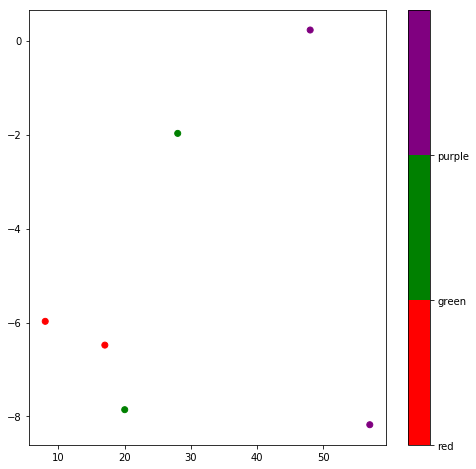

time: 158 ms


In [251]:
#plt.scatter(res1['ret_t0'], res1['del_slope'], labels = res1["retailer"])
import matplotlib

x = res1['delta_t0_wk']
y = res1['del_slope']
label = [0,0,1,1,2,2] #want to change it to actual index names
colors = ['red', 'green', 'purple']

fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

In [252]:
#try for one shoulder
trend = 'one shoulder'
t0 = '2018-11-18'
res1 = getdelta_t0(search_data, market_data, ret_list, trend, t0)

plot_t0_ret retailer Zara
plot_t0_ret retailer Asos
plot_t0_ret retailer Alice + Olivia
plot_t0_ret retailer Nordstrom
plot_t0_ret retailer Kohls
plot_t0_ret retailer Target
time: 217 ms


In [253]:
res1

,trend,trend_t0,trend_max_slope,retailer,Market Index,ret_t0,delta_t0_wk,m_slope_date,max_slope,del_slope
0,one shoulder,2018-11-18,3.768421,Zara,Fast Fashion Index,2019-03-17,17.0,2019-04-14,1.000000,-2.768421
1,one shoulder,2018-11-18,3.768421,Asos,Fast Fashion Index,2018-12-02,2.0,2019-10-06,4.065421,0.297000
2,one shoulder,2018-11-18,3.768421,Alice + Olivia,Contemporary Index,2019-03-03,15.0,2019-03-03,1.500000,-2.268421
3,one shoulder,2018-11-18,3.768421,Nordstrom,Contemporary Index,2018-12-09,3.0,2019-02-17,0.379167,-3.389254
4,one shoulder,2018-11-18,3.768421,Kohls,Mass Index,2019-03-24,18.0,2019-04-28,0.500000,-3.268421
5,one shoulder,2018-11-18,3.768421,Target,Mass Index,2019-04-07,20.0,2019-04-28,0.300000,-3.468421


time: 12 ms


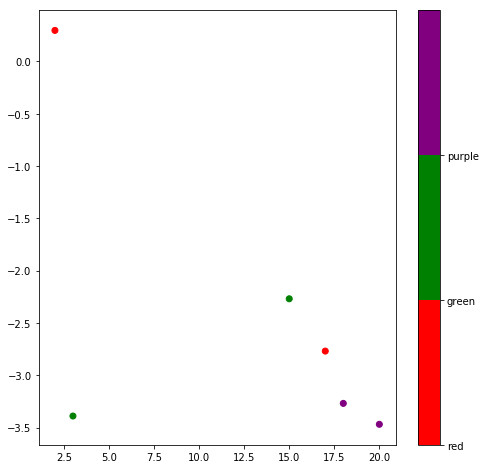

time: 180 ms


In [254]:
x = res1['delta_t0_wk']
y = res1['del_slope']
label = [0,0,1,1,2,2] #want to change it to actual index names
colors = ['red', 'green', 'purple']

fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

plot_t0_ret retailer Asos
ind post findswitchind 2
len of switchdatelist 5
first ind 2 first t0 2019-03-31


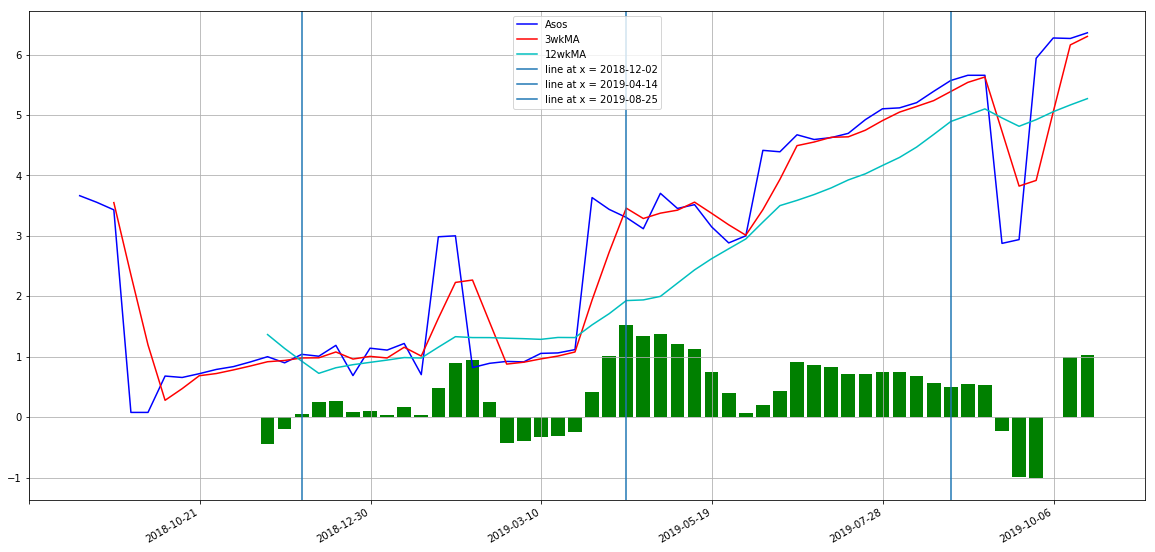

'2018-12-02'

time: 545 ms


In [464]:
plot_t0_ret(market_data, 'Asos', 'one%20shoulder', t0, makeplot = True)

In [262]:
all_retailers = market_data["Retail Site"].unique()

time: 1.19 ms


In [263]:
all_retailers = list(all_retailers[:-1])

time: 914 µs


In [269]:
#all_retailers.remove('Rag & Bone')
all_retailers.remove('Acne Studios')

time: 900 µs


In [300]:
market_data[(market_data["Retail Site"] == 'Acne Studios') & (market_data["trend"] == 'one%20shoulder')].isnull().sum(axis = 1).values[0]

87

time: 5.16 ms


In [284]:
market_data[market_data["Retail Site"] == 'Acne Studios'].shape

(6, 93)

time: 3.42 ms


In [332]:
# def val_retailers(market_data, trend):
#     #return list of retailers where is is not all 0 and it is not 
#     trend1W = '%20'.join(trend.split())
#     #trend_df = market_data[market_data["trend"] == trend1W]
#     retlist = []
#     for ret in (market_data["Retail Site"].unique())[:-1]:
#         #print("ret {}".format(ret))
#         ret_row = market_data[(market_data["Retail Site"] == ret)&(market_data["trend"] == trend1W)]
#         #ret_row = trend_df[trend_df["Retail Site"] == ret]
#         #print(ret_row)
#         #print(ret_row.shape)
#         inc = True
#         if ret_row.isnull().sum(axis = 1).values[0] == 87: #all rows is empty
#             inc = False
#         if ret_row.max(axis = 1).values[0] == ret_row.min(axis = 1).values[0]: #there is no fluctuation
#             inc = False
#         if ret_row.max(axis = 1).values[0] <=9: #not enough inventory    
#             inc = False
#         if inc:
#             retlist.append(ret)
    
#     return retlist

time: 3.28 ms


In [315]:
all_ret_one_shoulder = val_retailers(market_data, trend)

           Market Index     Retail Site Retailer ID Crawled?  2/25/18  3/4/18  \
1.0  Contemporary Index  Alice + Olivia         864  Crawler      7.0     6.0   

     3/11/18  3/18/18  3/25/18  4/1/18  ...  9/1/19  9/8/19  9/15/19  9/22/19  \
1.0      7.0      7.0     10.0    10.0  ...     1.0     1.0      1.0      1.0   

     9/29/19  10/6/19  10/13/19  10/20/19  ret_id           trend  
1.0      1.0      1.0       1.0       NaN     864  one%20shoulder  

[1 rows x 93 columns]
           Market Index    Retail Site             Retailer ID Crawled?  \
7.0  Contemporary Index  Isabel Marant  400331576-isabelmarant  Crawler   

     2/25/18  3/4/18  3/11/18  3/18/18  3/25/18  4/1/18  ...  9/1/19  9/8/19  \
7.0      NaN     NaN      NaN      NaN      NaN     NaN  ...     NaN     NaN   

     9/15/19  9/22/19  9/29/19  10/6/19  10/13/19  10/20/19  \
7.0      NaN      NaN      NaN      NaN       NaN       NaN   

                     ret_id           trend  
7.0  400331576-isabelmarant  o

[1 rows x 93 columns]
             Market Index Retail Site Retailer ID Crawled?  2/25/18  3/4/18  \
133.0  Contemporary Index    Intermix          23  Crawler     26.0    32.0   

       3/11/18  3/18/18  3/25/18  4/1/18  ...  9/1/19  9/8/19  9/15/19  \
133.0     31.0     29.0     29.0    64.0  ...    72.0    76.0     82.0   

       9/22/19  9/29/19  10/6/19  10/13/19  10/20/19  ret_id           trend  
133.0     85.0     85.0     80.0      88.0      94.0      23  one%20shoulder  

[1 rows x 93 columns]
             Market Index    Retail Site             Retailer ID Crawled?  \
139.0  Contemporary Index  Seed Heritage  756639511-seedheritage  Crawler   

       2/25/18  3/4/18  3/11/18  3/18/18  3/25/18  4/1/18  ...  9/1/19  \
139.0      NaN     NaN      NaN      NaN      NaN     NaN  ...     1.0   

       9/8/19  9/15/19  9/22/19  9/29/19  10/6/19  10/13/19  10/20/19  \
139.0     1.0      NaN      NaN      NaN      NaN       NaN       NaN   

                       ret_id         

       Market Index    Retail Site             Retailer ID Crawled?  2/25/18  \
343.0  Luxury Index  Saint Laurent  562481900-saintlaurent  Crawler      NaN   

       3/4/18  3/11/18  3/18/18  3/25/18  4/1/18  ...  9/1/19  9/8/19  \
343.0     NaN      NaN      NaN      NaN     NaN  ...     3.0     3.0   

       9/15/19  9/22/19  9/29/19  10/6/19  10/13/19  10/20/19  \
343.0      3.0      3.0      3.0      3.0       3.0       3.0   

                       ret_id           trend  
343.0  562481900-saintlaurent  one%20shoulder  

[1 rows x 93 columns]
       Market Index Retail Site          Retailer ID Crawled?  2/25/18  \
349.0  Luxury Index   Valentino  312443187-valentino  Crawler      NaN   

       3/4/18  3/11/18  3/18/18  3/25/18  4/1/18  ...  9/1/19  9/8/19  \
349.0     NaN      NaN      NaN      NaN     NaN  ...     NaN     NaN   

       9/15/19  9/22/19  9/29/19  10/6/19  10/13/19  10/20/19  \
349.0      NaN      NaN      NaN      NaN       NaN       NaN   

               

      Market Index Retail Site Retailer ID Crawled?  2/25/18  3/4/18  3/11/18  \
451.0   Mass Index        Belk    986-belk  Crawler      NaN     NaN      NaN   

       3/18/18  3/25/18  4/1/18  ...  9/1/19  9/8/19  9/15/19  9/22/19  \
451.0      NaN      NaN     NaN  ...    26.0    25.0     26.0     24.0   

       9/29/19  10/6/19  10/13/19  10/20/19    ret_id           trend  
451.0     22.0     24.0      23.0      24.0  986-belk  one%20shoulder  

[1 rows x 93 columns]
      Market Index       Retail Site               Retailer ID Crawled?  \
457.0   Mass Index  Children's Place  842544654-childrensplace  Crawler   

       2/25/18  3/4/18  3/11/18  3/18/18  3/25/18  4/1/18  ...  9/1/19  \
457.0      NaN     NaN      NaN      NaN      NaN     NaN  ...     NaN   

       9/8/19  9/15/19  9/22/19  9/29/19  10/6/19  10/13/19  10/20/19  \
457.0     NaN      NaN      NaN      NaN      NaN       NaN       NaN   

                         ret_id           trend  
457.0  842544654-childre

              Market Index Retail Site Retailer ID Crawled?  2/25/18  3/4/18  \
565.0  Specialty/DTC Index    Glossier        1953  Crawler      NaN     NaN   

       3/11/18  3/18/18  3/25/18  4/1/18  ...  9/1/19  9/8/19  9/15/19  \
565.0      NaN      NaN      NaN     NaN  ...     NaN     NaN      NaN   

       9/22/19  9/29/19  10/6/19  10/13/19  10/20/19  ret_id           trend  
565.0      NaN      NaN      NaN       NaN       NaN    1953  one%20shoulder  

[1 rows x 93 columns]
              Market Index  Retail Site Retailer ID Crawled?  2/25/18  3/4/18  \
571.0  Specialty/DTC Index  Reformation        2382  Crawler      NaN     NaN   

       3/11/18  3/18/18  3/25/18  4/1/18  ...  9/1/19  9/8/19  9/15/19  \
571.0      NaN      NaN      NaN     NaN  ...     6.0     6.0      5.0   

       9/22/19  9/29/19  10/6/19  10/13/19  10/20/19  ret_id           trend  
571.0      5.0      6.0      6.0       6.0       6.0    2382  one%20shoulder  

[1 rows x 93 columns]
              Ma

In [316]:
len(all_ret_one_shoulder)

45

time: 2.13 ms


In [320]:
res_all = getdelta_t0(search_data, market_data, all_ret_one_shoulder, trend, t0)

plot_t0_ret retailer Alice + Olivia
ind post findswitchind 2
len of switchdatelist 6
plot_t0_ret retailer Isabel Marant
ind post findswitchind -1
len of switchdatelist 4
plot_t0_ret retailer A.L.C.
ind post findswitchind -1
len of switchdatelist 3
plot_t0_ret retailer Revolve
ind post findswitchind 2
len of switchdatelist 4
plot_t0_ret retailer Shopbop.com
ind post findswitchind 2
len of switchdatelist 4
plot_t0_ret retailer Bloomingdales
ind post findswitchind 0
len of switchdatelist 4
plot_t0_ret retailer Yoox.com
ind post findswitchind -1
len of switchdatelist 7
plot_t0_ret retailer SSense
ind post findswitchind -1
len of switchdatelist 4
plot_t0_ret retailer Nordstrom
ind post findswitchind 2
len of switchdatelist 7
plot_t0_ret retailer Intermix
ind post findswitchind 1
len of switchdatelist 6
plot_t0_ret retailer Forward By Elyse Walker
switchdatelist is empty
plot_t0_ret retailer Eloquii
ind post findswitchind 0
len of switchdatelist 3
plot_t0_ret retailer Asos
ind post findswitc

In [321]:
res_all

,trend,trend_t0,trend_max_slope,retailer,Market Index,ret_t0,delta_t0_wk,m_slope_date,max_slope,del_slope
0,one shoulder,2018-11-18,10.228571,Alice + Olivia,Contemporary Index,2019-03-03,15.000000,2019-03-03,1.500000,-8.728571
1,one shoulder,2018-11-18,10.228571,Isabel Marant,Contemporary Index,2019-10-20,48.000000,2019-01-06,1.222222,-9.006349
2,one shoulder,2018-11-18,10.228571,A.L.C.,Contemporary Index,2019-09-08,42.000000,2018-12-16,1.000000,-9.228571
3,one shoulder,2018-11-18,10.228571,Revolve,Contemporary Index,2018-12-09,3.000000,2019-03-31,0.357143,-9.871429
4,one shoulder,2018-11-18,10.228571,Shopbop.com,Contemporary Index,2019-04-21,22.000000,2019-08-04,0.531250,-9.697321
5,one shoulder,2018-11-18,10.228571,Bloomingdales,Contemporary Index,2019-05-05,24.000000,2019-06-23,0.261682,-9.966889
6,one shoulder,2018-11-18,10.228571,Yoox.com,Contemporary Index,2019-08-18,39.000000,2019-08-18,4.552147,-5.676424
7,one shoulder,2018-11-18,10.228571,SSense,Contemporary Index,2019-09-29,45.000000,2018-12-02,1.166667,-9.061905
8,one shoulder,2018-11-18,10.228571,Nordstrom,Contemporary Index,2018-12-09,3.000000,2019-02-17,0.379167,-9.849405
9,one shoulder,2018-11-18,10.228571,Intermix,Contemporary Index,2019-02-17,13.000000,2019-02-10,0.907407,-9.321164


time: 23.1 ms


In [326]:
### new chart generation ###
search_data = pkl.load(open("./data/search_data_2019-09.pkl", "rb"))
#retailers = ['Zara', 'Asos', 'Alice + Olivia', 'Nordstrom', 'Kohls', 'Target']
trends = ['neon', 'paper bag waist', 'one shoulder', 'puff sleeve', 'high waisted jeans', 'animal print']
trends_t0 = [return_t0(t,search_data) for t in trends]
market_data = pd.read_csv('df_cnt_all_111919.csv',index_col=0)

time: 232 ms


In [327]:
market_data.head(2)

,Market Index,Retail Site,Retailer ID,Crawled?,2/25/18,3/4/18,3/11/18,3/18/18,3/25/18,4/1/18,...,9/1/19,9/8/19,9/15/19,9/22/19,9/29/19,10/6/19,10/13/19,10/20/19,ret_id,trend
0.0,Contemporary Index,Alice + Olivia,864,Crawler,3.0,3.0,3.0,3.0,5.0,5.0,...,5.0,5.0,6.0,5.0,5.0,6.0,5.0,6.0,864,neon
1.0,Contemporary Index,Alice + Olivia,864,Crawler,7.0,6.0,7.0,7.0,10.0,10.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,864,one%20shoulder


time: 19.4 ms


In [334]:
#plot for one_shoulder
all_ret_one_shoulder = val_retailers(market_data, trends[2])
print(len(all_ret_one_shoulder))
res1 = getdelta_t0(search_data, market_data, all_ret_one_shoulder, trends[2], trends_t0[2])

45
plot_t0_ret retailer Alice + Olivia
ind post findswitchind 2
len of switchdatelist 6
plot_t0_ret retailer Isabel Marant
ind post findswitchind -1
len of switchdatelist 4
plot_t0_ret retailer A.L.C.
ind post findswitchind -1
len of switchdatelist 3
plot_t0_ret retailer Revolve
ind post findswitchind 2
len of switchdatelist 4
plot_t0_ret retailer Shopbop.com
ind post findswitchind 2
len of switchdatelist 4
plot_t0_ret retailer Bloomingdales
ind post findswitchind 0
len of switchdatelist 4
plot_t0_ret retailer Yoox.com
ind post findswitchind -1
len of switchdatelist 7
plot_t0_ret retailer SSense
ind post findswitchind -1
len of switchdatelist 4
plot_t0_ret retailer Nordstrom
ind post findswitchind 2
len of switchdatelist 7
plot_t0_ret retailer Intermix
ind post findswitchind 1
len of switchdatelist 6
plot_t0_ret retailer Forward By Elyse Walker
switchdatelist is empty
plot_t0_ret retailer Eloquii
ind post findswitchind 0
len of switchdatelist 3
plot_t0_ret retailer Asos
ind post findsw

In [335]:
res1

,trend,trend_t0,trend_max_slope,retailer,Market Index,ret_t0,delta_t0_wk,m_slope_date,max_slope,del_slope
0,one shoulder,2018-11-18,10.228571,Alice + Olivia,Contemporary Index,2019-03-03,15.000000,2019-03-03,1.500000,-8.728571
1,one shoulder,2018-11-18,10.228571,Isabel Marant,Contemporary Index,2019-10-20,48.000000,2019-01-06,1.222222,-9.006349
2,one shoulder,2018-11-18,10.228571,A.L.C.,Contemporary Index,2019-09-08,42.000000,2018-12-16,1.000000,-9.228571
3,one shoulder,2018-11-18,10.228571,Revolve,Contemporary Index,2018-12-09,3.000000,2019-03-31,0.357143,-9.871429
4,one shoulder,2018-11-18,10.228571,Shopbop.com,Contemporary Index,2019-04-21,22.000000,2019-08-04,0.531250,-9.697321
5,one shoulder,2018-11-18,10.228571,Bloomingdales,Contemporary Index,2019-05-05,24.000000,2019-06-23,0.261682,-9.966889
6,one shoulder,2018-11-18,10.228571,Yoox.com,Contemporary Index,2019-08-18,39.000000,2019-08-18,4.552147,-5.676424
7,one shoulder,2018-11-18,10.228571,SSense,Contemporary Index,2019-09-29,45.000000,2018-12-02,1.166667,-9.061905
8,one shoulder,2018-11-18,10.228571,Nordstrom,Contemporary Index,2018-12-09,3.000000,2019-02-17,0.379167,-9.849405
9,one shoulder,2018-11-18,10.228571,Intermix,Contemporary Index,2019-02-17,13.000000,2019-02-10,0.907407,-9.321164


time: 22.6 ms


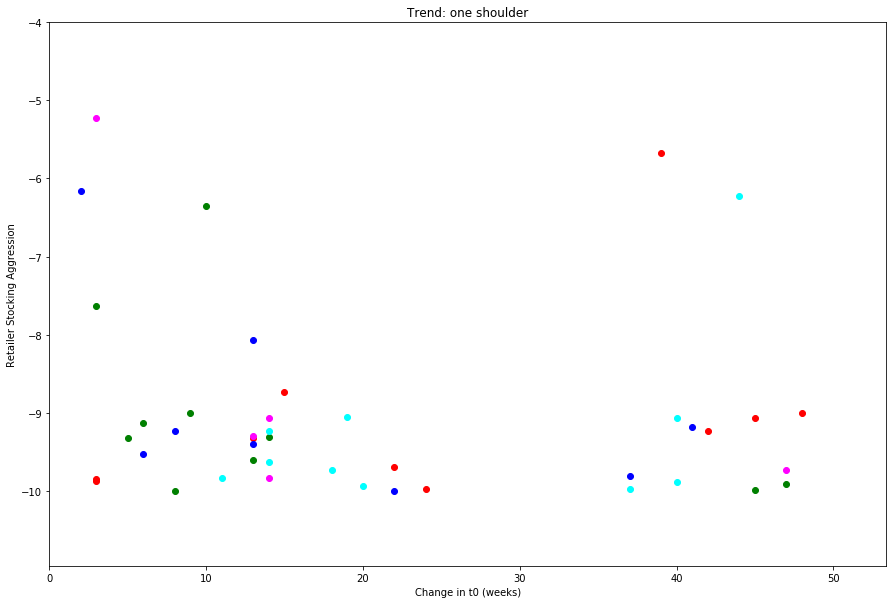

time: 435 ms


In [342]:
import itertools
x = res1['delta_t0_wk']
y = res1['del_slope']
market_colors = ['red','blue','green','cyan','magenta']#["firebrick", "olivedrab", "darkorange",'darkturquoise','violet']
market_indices = res1['Market Index'].values
retailers = res1['retailer'].values
colors = itertools.cycle(market_colors)

fig = plt.figure(figsize=(15,10))

for i in range(len(x)):
    if i == 0:
        color = next(colors)
    if i != 0 and market_indices[i] != market_indices[i-1]: #if this is a new market index label, switch colors
        color = next(colors) 
        
    plt.scatter(x[i], y[i], c=color, label=market_indices[i])
    #plt.annotate(retailers[i], (x[i], y[i]))



plt.xlabel("Change in t0 (weeks)")
plt.ylabel("Retailer Stocking Aggression")
plt.title("Trend: {}".format(res1['trend'].unique()[0]))
plt.ylim(top= -4)
plt.xlim(left = 0)
#plt.legend()
plt.show()

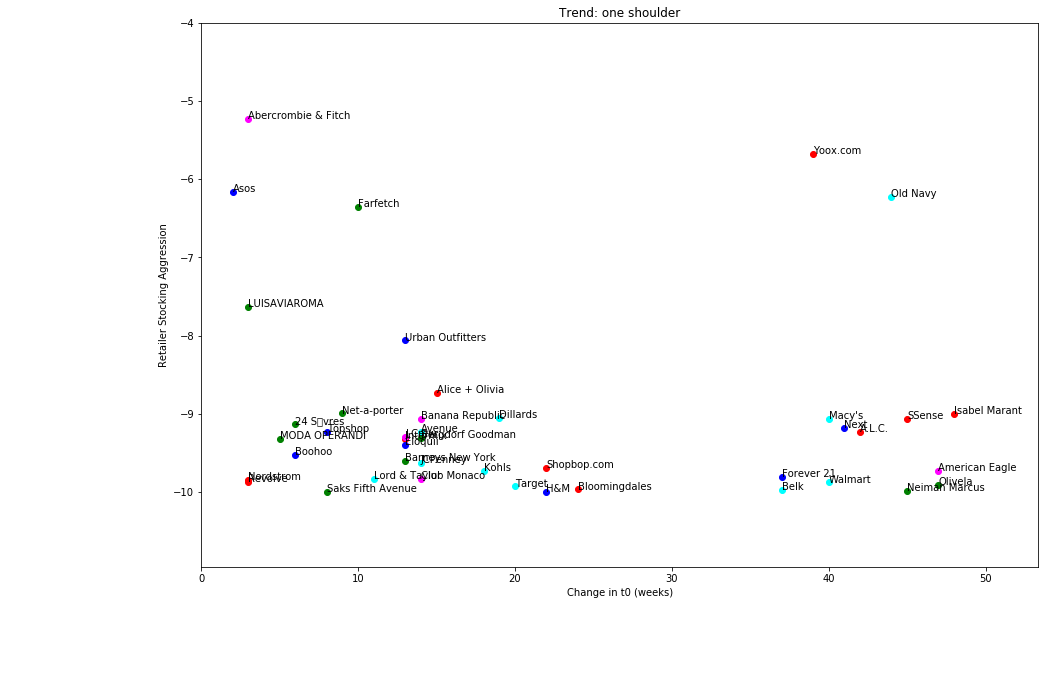

time: 406 ms


In [343]:
import itertools
x = res1['delta_t0_wk']
y = res1['del_slope']
market_colors = ['red','blue','green','cyan','magenta']#["firebrick", "olivedrab", "darkorange",'darkturquoise','violet']
market_indices = res1['Market Index'].values
retailers = res1['retailer'].values
colors = itertools.cycle(market_colors)

fig = plt.figure(figsize=(15,10))

for i in range(len(x)):
    if i == 0:
        color = next(colors)
    if i != 0 and market_indices[i] != market_indices[i-1]: #if this is a new market index label, switch colors
        color = next(colors) 
        
    plt.scatter(x[i], y[i], c=color, label=market_indices[i])
    plt.annotate(retailers[i], (x[i], y[i]))



plt.xlabel("Change in t0 (weeks)")
plt.ylabel("Retailer Stocking Aggression")
plt.title("Trend: {}".format(res1['trend'].unique()[0]))
plt.ylim(top= -4)
plt.xlim(left = 0)
#plt.legend()
plt.show()

37
ind post findswitchind 10
len of switchdatelist 12
first ind 10 first t0 2019-01-13


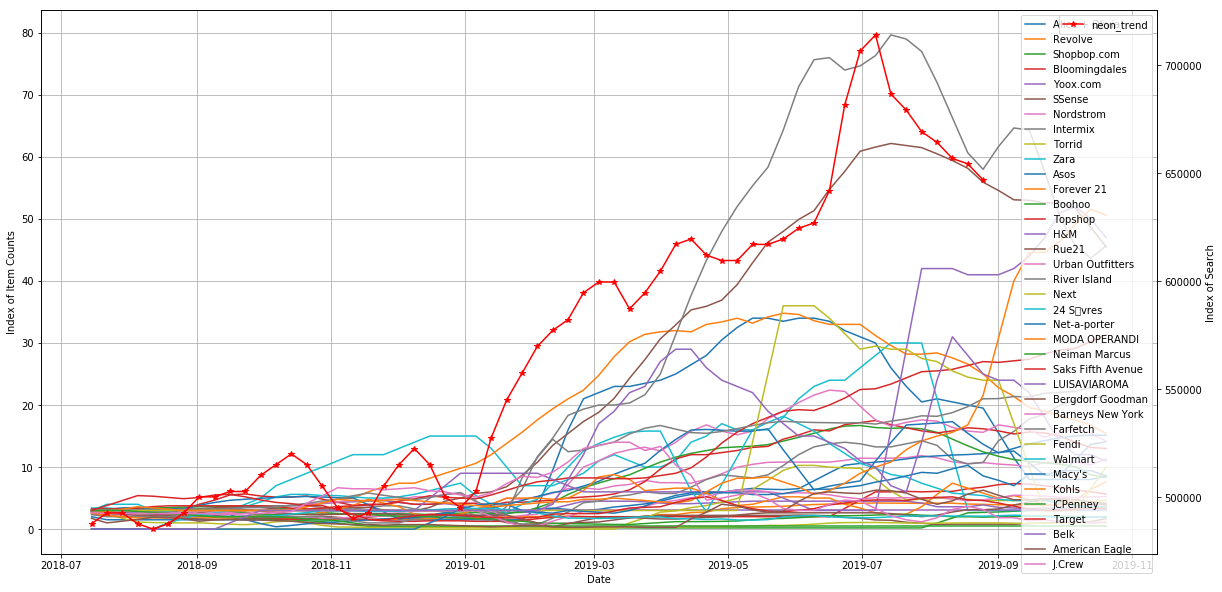

,Date,Max Slope
Alice + Olivia,2019-02-17,6.500000
Revolve,2019-04-28,0.548387
Shopbop.com,2019-08-18,0.842105
Bloomingdales,2019-06-23,1.333333
Yoox.com,2019-02-17,0.600000
SSense,2019-10-20,0.473684
Nordstrom,2019-01-06,1.120000
Intermix,2019-09-01,3.500000
Torrid,2018-10-07,0.315789
Zara,2019-04-14,3.000000


time: 1.07 s


In [451]:
all_ret_neon = val_retailers(market_data, trends[0])
print(len(all_ret_neon))
plot_multicurve(search_data, market_data, trends[0], all_ret_neon, 3,True)

In [452]:
res1 = getdelta_t0(search_data, market_data, all_ret_neon, trends[0], trends_t0[0])

plot_t0_ret retailer Alice + Olivia
ind post findswitchind 0
len of switchdatelist 2
first ind 0 first t0 2018-09-23
plot_t0_ret retailer Revolve
ind post findswitchind 3
len of switchdatelist 6
first ind 3 first t0 2019-03-24
plot_t0_ret retailer Shopbop.com
ind post findswitchind -1
len of switchdatelist 3
no switch before topdate, set t0 to 2018-02-25
plot_t0_ret retailer Bloomingdales
ind post findswitchind 0
len of switchdatelist 2
first ind 0 first t0 2019-01-27
plot_t0_ret retailer Yoox.com
ind post findswitchind 1
len of switchdatelist 6
first ind 1 first t0 2019-02-17
plot_t0_ret retailer SSense
ind post findswitchind 4
len of switchdatelist 7
first ind 4 first t0 2019-03-10
plot_t0_ret retailer Nordstrom
ind post findswitchind 2
len of switchdatelist 7
first ind 2 first t0 2019-01-06
plot_t0_ret retailer Intermix
ind post findswitchind -1
len of switchdatelist 7
no switch before topdate, set t0 to 2018-02-25
plot_t0_ret retailer Torrid
ind post findswitchind 2
len of switchda

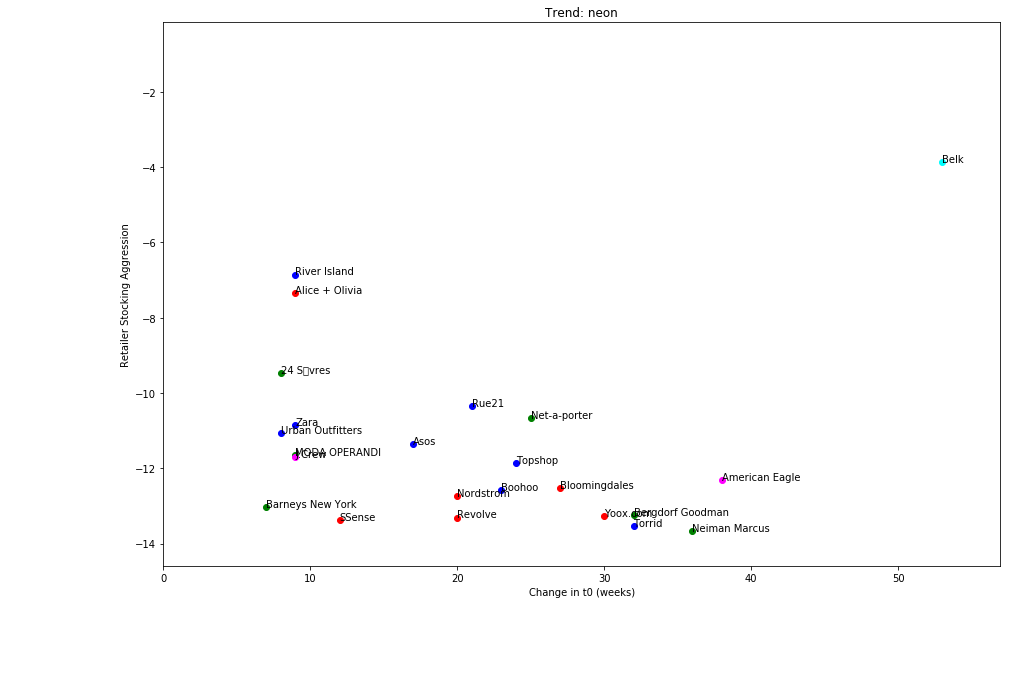

time: 335 ms


In [453]:
import itertools
x = res1['delta_t0_wk']
y = res1['del_slope']
market_colors = ['red','blue','green','cyan','magenta']#["firebrick", "olivedrab", "darkorange",'darkturquoise','violet']
market_indices = res1['Market Index'].values
retailers = res1['retailer'].values
colors = itertools.cycle(market_colors)

fig = plt.figure(figsize=(15,10))

for i in range(len(x)):
    if i == 0:
        color = next(colors)
    if i != 0 and market_indices[i] != market_indices[i-1]: #if this is a new market index label, switch colors
        color = next(colors) 
        
    plt.scatter(x[i], y[i], c=color, label=market_indices[i])
    plt.annotate(retailers[i], (x[i], y[i]))



plt.xlabel("Change in t0 (weeks)")
plt.ylabel("Retailer Stocking Aggression")
plt.title("Trend: {}".format(res1['trend'].unique()[0]))
#plt.ylim(top= -4)
plt.xlim(left = 0)
#plt.legend()
plt.show()

In [449]:
#for ppr bag
all_ret_ppr = val_retailers(market_data, trends[1])
print(len(all_ret_one_shoulder))
res1 = getdelta_t0(search_data, market_data, all_ret_ppr, trends[1], trends_t0[1])

37
plot_t0_ret retailer Revolve
ind post findswitchind -1
len of switchdatelist 9
no switch before topdate, set t0 to 2018-02-25
plot_t0_ret retailer Shopbop.com
ind post findswitchind -1
len of switchdatelist 7
no switch before topdate, set t0 to 2018-02-25
plot_t0_ret retailer Intermix
ind post findswitchind -1
len of switchdatelist 9
no switch before topdate, set t0 to 2018-02-25
plot_t0_ret retailer Asos
ind post findswitchind 13
len of switchdatelist 17
first ind 13 first t0 2019-03-31
plot_t0_ret retailer Boohoo
ind post findswitchind 1
len of switchdatelist 7
first ind 1 first t0 2018-07-08
plot_t0_ret retailer Topshop
ind post findswitchind -1
len of switchdatelist 9
no switch before topdate, set t0 to 2018-02-25
plot_t0_ret retailer H&M
ind post findswitchind -1
len of switchdatelist 5
no switch before topdate, set t0 to 2018-02-25
plot_t0_ret retailer River Island
ind post findswitchind 1
len of switchdatelist 7
first ind 1 first t0 2018-11-11
plot_t0_ret retailer MODA OPERAN

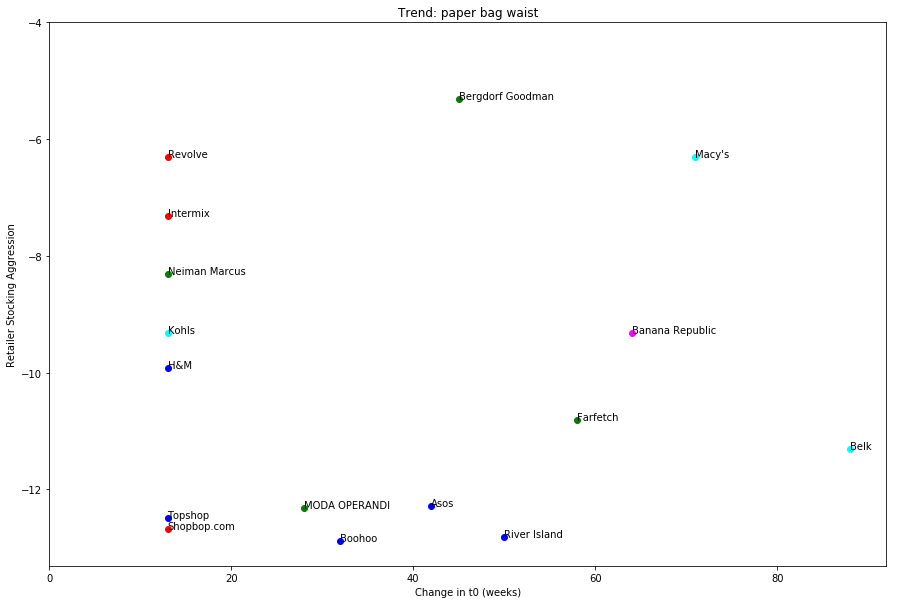

time: 230 ms


In [450]:
import itertools
x = res1['delta_t0_wk']
y = res1['del_slope']
market_colors = ['red','blue','green','cyan','magenta']#["firebrick", "olivedrab", "darkorange",'darkturquoise','violet']
market_indices = res1['Market Index'].values
retailers = res1['retailer'].values
colors = itertools.cycle(market_colors)

fig = plt.figure(figsize=(15,10))

for i in range(len(x)):
    if i == 0:
        color = next(colors)
    if i != 0 and market_indices[i] != market_indices[i-1]: #if this is a new market index label, switch colors
        color = next(colors) 
        
    plt.scatter(x[i], y[i], c=color, label=market_indices[i])
    plt.annotate(retailers[i], (x[i], y[i]))



plt.xlabel("Change in t0 (weeks)")
plt.ylabel("Retailer Stocking Aggression")
plt.title("Trend: {}".format(res1['trend'].unique()[0]))
plt.ylim(top= -4)
plt.xlim(left = 0)
#plt.legend()
plt.show()

In [424]:
# Moved to CP_trend.py
# def market_data_fillna():    
#     '''
#     saved filled df_cnt_all as df_cnt_all112019.csv
#     '''
#     market_data = pd.read_csv('df_cnt_all_111919.csv',index_col=0)
#     market_data_ff = market_data[week_cols].T.fillna(method = 'ffill').fillna(0)
#     MD2 = market_data_ff.T

#     beg_cols = market_data.columns[:4]
#     end_cols = market_data.columns[-2:]

#     MD2[beg_cols] = market_data[beg_cols]
#     MD2[end_cols] = market_data[end_cols]
#     MD2 = MD2[list(beg_cols) + week_cols + list(end_cols)]

#     MD2.to_csv("df_cnt_all_112019.csv")

time: 20.7 ms


In [457]:
market_data = pd.read_csv('df_cnt_all_112019.csv',index_col=0)

time: 84.6 ms


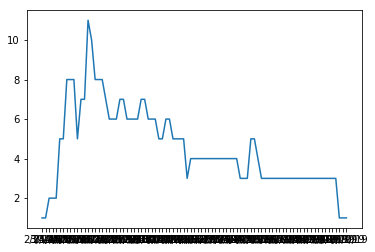

time: 1.32 s


In [458]:
imx_ppr = market_data[(market_data['trend'] == trend1W) & (market_data['Retail Site'] == "Intermix")]
week_cols = list(imx_ppr.columns[4:-2])
imx_pprT = imx_ppr[week_cols].T
imx_pprT.columns = ['count']

plt.plot(imx_pprT)

ind post findswitchind 3
len of switchdatelist 19
first ind 3 first t0 2018-01-14


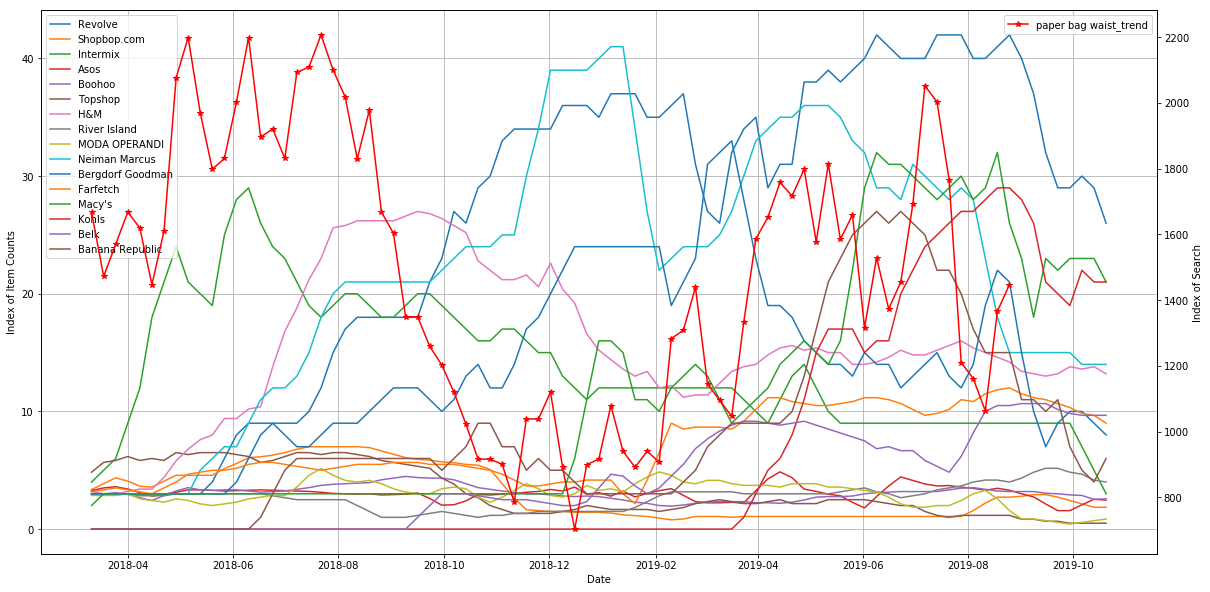

,Date,Max Slope
Revolve,2019-04-28,7.000000
Shopbop.com,2019-08-11,0.642857
Intermix,2018-04-15,6.000000
Asos,2019-03-31,1.033333
Boohoo,2018-04-22,0.428571
Topshop,2018-03-18,0.833333
H&M,2018-06-24,3.400000
River Island,2019-01-27,0.500000
MODA OPERANDI,2018-07-15,1.000000
Neiman Marcus,2018-11-18,5.000000


time: 823 ms


In [459]:
plot_multicurve(search_data, market_data, trends[1], all_ret_ppr, 3,True)

plot_t0_ret retailer Intermix
ind post findswitchind -1
len of switchdatelist 9
no switch before topdate, set t0 to find_green
t0 {}, should be first positive green bar
t0 is now 2018-05-13


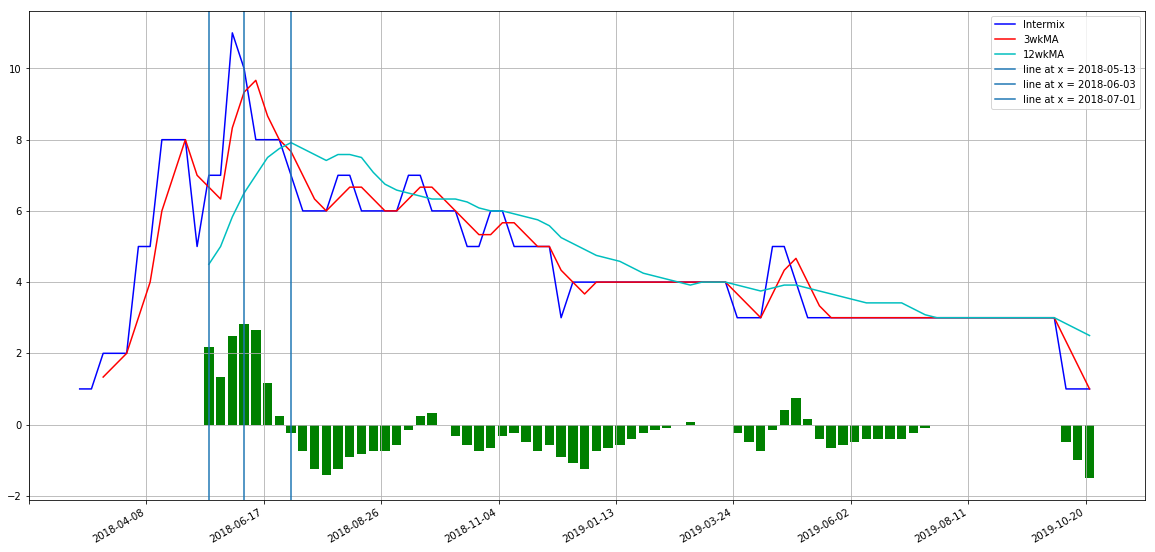

'2018-05-13'

time: 553 ms


In [461]:
trend1W = '%20'.join(trends[1].split())
plot_t0_ret(market_data, "Intermix", trend1W, "2017-11-26", makeplot = True)

plot_t0_ret retailer Revolve
ind post findswitchind -1
len of switchdatelist 9
no switch before topdate, set t0 to find_green
t0 {}, should be first positive green bar
t0 is now 2018-05-20


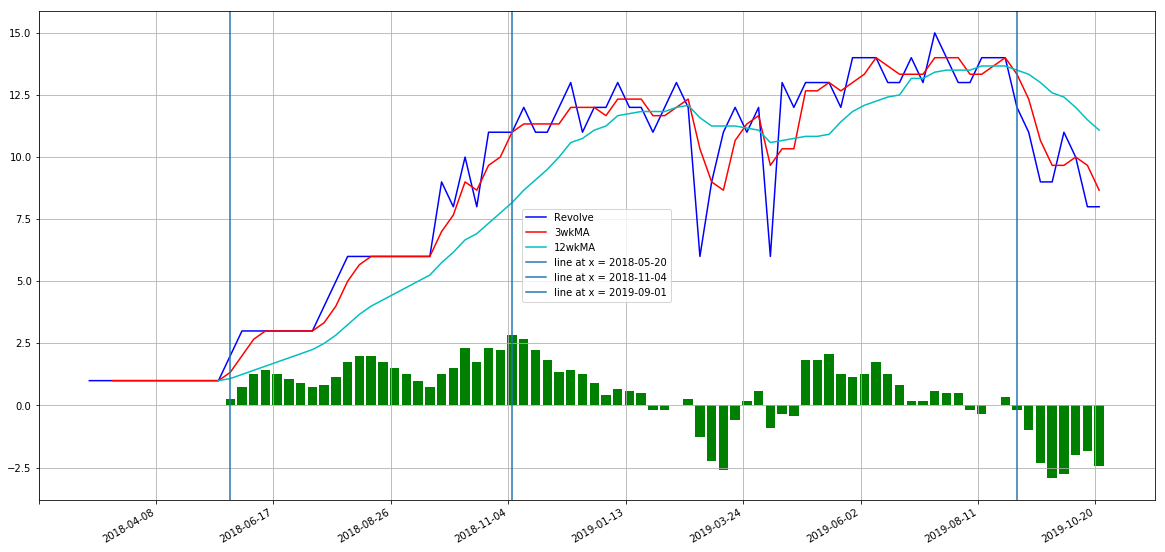

'2018-05-20'

time: 543 ms


In [462]:
plot_t0_ret(market_data, "Revolve", trend1W, "2017-11-26", makeplot = True)

plot_t0_ret retailer Neiman Marcus
ind post findswitchind -1
len of switchdatelist 3
no switch before topdate, set t0 to find_green
t0 {}, should be first positive green bar
t0 is now 2018-05-13


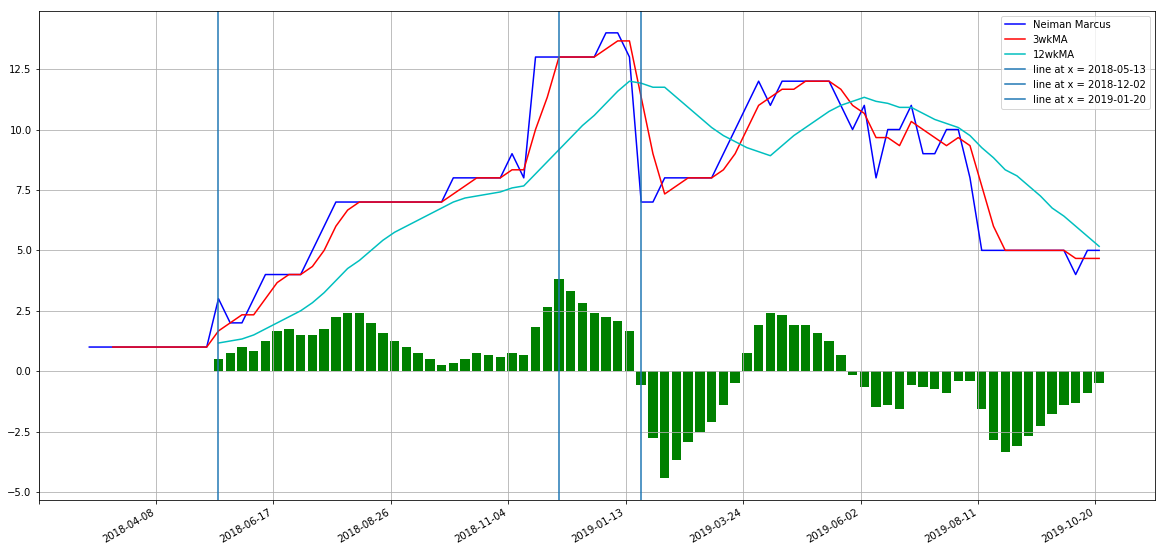

'2018-05-13'

time: 530 ms


In [463]:
plot_t0_ret(market_data, "Neiman Marcus", trend1W, "2017-11-26", makeplot = True)

# 

In [ ]:
#### SEPARATE SECTION ####

In [377]:
## fancy fillna for count
cnt_df = market_data[week_cols].copy()
ser0 = cnt_df.loc[0] #go through each row
ser0[ser0.isnull() == True].index #find all the weeks that are null
nulldates = list(ser0[ser0.isnull() == True].index)

time: 2.35 ms


In [403]:
#custom filling null values
def fill_last_val(fill_dates):
    print('fill last val on these')
    print(fill_dates)
    #check if this starts in the beginning, 2/25/2018, if so then fill 0

def fill_zeros(fill_dates):
    print('fill zero on these')
    print(fill_dates)
    
def treatnull(nulldates):
    old_ind = -1 #initalize with neg valu
    num_consec = 0
    fill_dates = []
    for nd in nulldates:
        
        #if it is not consecutive for 3 or more weeks
        #fill with last value
        next_ind = week_cols.index(nd)
        #print(next_ind)
        if old_ind == -1:#this is the first null date
            fill_dates.append(nd)
        elif next_ind == old_ind + 1: #it is consecutive
                num_consec +=1
                fill_dates.append(nd)
        else:#this null date is not consecutive
            if num_consec <3: #1 or 2 empty weeks
                fill_last_val(fill_dates) #need to write this function
            else: #3 or more weeks
                fill_zeros(fill_dates)
            #reset values
            num_consec = 0
            fill_dates = [nd]
        #set old to current
        old_ind = next_ind
    #if they are all consecutive
    if num_consec <3: #1 or 2 empty weeks
        fill_last_val(fill_dates) #need to write this function
    else: #3 or more weeks
        fill_zeros(fill_dates) 
    #if it is consecutive for more than 3 weeks, fill with 0

time: 3.48 ms


In [405]:
ser1 = cnt_df.loc[1] #go through each row
ser1[ser1.isnull() == True].index #find all the weeks that are null
nulldates1 = list(ser1[ser1.isnull() == True].index)

time: 3.29 ms


In [406]:
treatnull(nulldates1)

46
47
48
49
50
51
66
fill zero on these
['1/13/19', '1/20/19', '1/27/19', '2/3/19', '2/10/19', '2/17/19']
67
86
fill last val on these
['6/2/19', '6/9/19']
fill last val on these
['10/20/19']
time: 1.28 ms


In [407]:
ser132 = cnt_df.loc[132] #go through each row
ser132[ser132.isnull() == True].index #find all the weeks that are null
nulldates132 = list(ser1[ser1.isnull() == True].index)

time: 3.29 ms


In [408]:
treatnull(nulldates132)

46
47
48
49
50
51
66
fill zero on these
['1/13/19', '1/20/19', '1/27/19', '2/3/19', '2/10/19', '2/17/19']
67
86
fill last val on these
['6/2/19', '6/9/19']
fill last val on these
['10/20/19']
time: 1.68 ms
